# PROJECT TITLE: PERFORMANCE EVALUATION OF SUPERMARKET

# Introduction

This research is based on historical record of sales data in 3 different supermarkets.The growth of supermarkets in most populated cities are increasing and market competitions are also high.This dataset is one of the historical sales of supermarket company located in various cities of Myanmar which has recorded on 3 different branches for 3 months data. 


# Attribute Information

# Questions 

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the data set

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

# DATA ANALYSIS

In [3]:
#viewing data
df.head() 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#Checking shape
df.shape

(1000, 17)

This data set contains 1000 entries and 17 Features.

In [5]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#Checking for Null Values
df.isnull().sum() 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We can observe that the data set dosen't contain any null values.

In [7]:
#Viewing descriptive statistics
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


We can see that the mean Performance Rating of all the employees is 6.9727.

# Variable Transformations

In [8]:
#assigning the data to another variable
df=df.copy() 

In [9]:
df["Date"]=pd.to_datetime(df["Date"])
df["weekday"]=df["Date"].dt.day_name()
df["month"]=df["Date"].dt.month_name()

# Set the Date as the index of the dataset

In [10]:
df.set_index("Date",inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month
Date,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


# Visualization

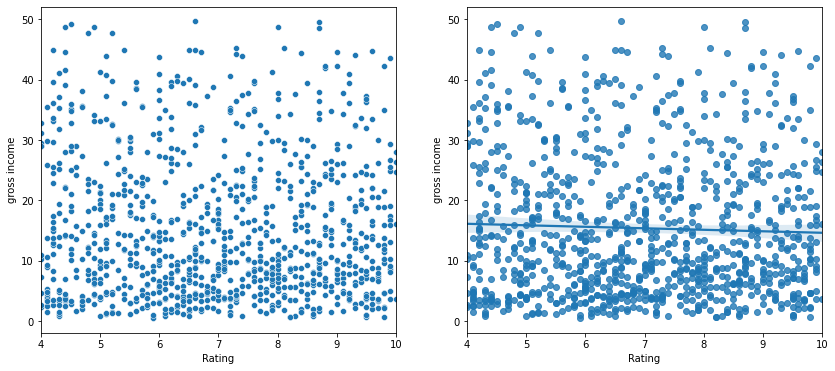

In [11]:
#Q1: Does gross income affect the ratings that the customers provide?

fig,axes=plt.subplots(1,2,sharex=True,figsize=(14,6))
sns.scatterplot(ax=axes[0],x=df["Rating"],y=df["gross income"])
sns.regplot(ax=axes[1],x=df["Rating"],y=df["gross income"])
plt.show()

As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between gross income of a customer and his rating.

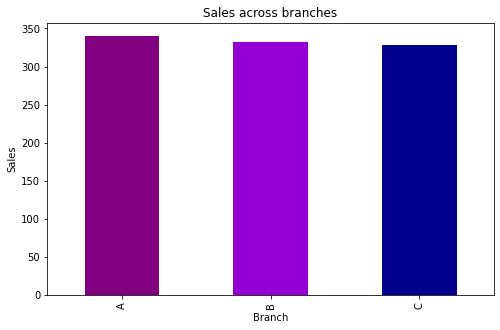

A    340
B    332
C    328
Name: Branch, dtype: int64

In [12]:
#Q2: Is there any difference in aggregate sales across branches?

fig,a=plt.subplots(1,1,figsize=(8,5))
df["Branch"].value_counts().plot(kind="bar",color=["purple","darkviolet","darkblue"],title="Sales across branches")
plt.xlabel("Branch")
plt.ylabel("Sales")
plt.show()

df.Branch.value_counts().sort_values(ascending=False)

There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A(i.e, Yangon city) is a bit higher than the rest of the branches.

C:\Users\karun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


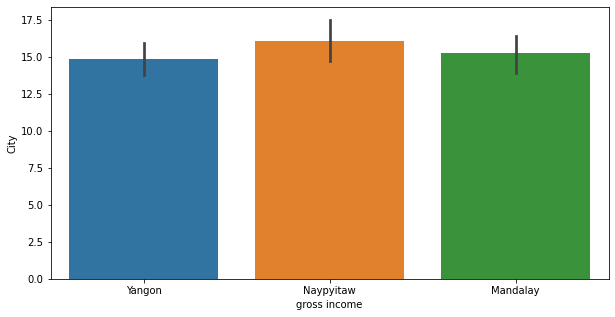

City
Naypyitaw    16.052367
Mandalay     15.232024
Yangon       14.874001
Name: gross income, dtype: float64

In [13]:
#Q3: Which City is the most profitable?

plt.figure(figsize=(10,5)) 
sns.barplot(df["City"],df["gross income"])
plt.ylabel("City")
plt.xlabel("gross income")
plt.show()
plt.show()

df.groupby("City")["gross income"].mean().sort_values(ascending=False)

There is not much difference in gross income by cities at an average level. Naypyitaw city has a slightly higher income than Yangon or Mandalay.

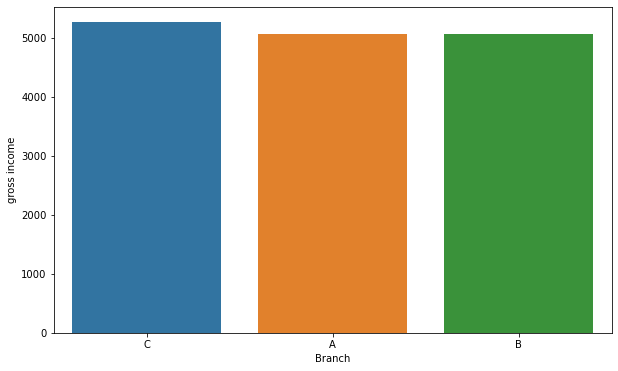

In [14]:
#Q4: Which Branch has highest gross income?

branch=df[["Branch","gross income"]].groupby(["Branch"],as_index=False).sum().sort_values(by="gross income", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x="Branch",y="gross income",data=branch)
plt.show()

Branch C has highest gross income

In [15]:
pd.pivot_table(df,columns="Branch",aggfunc="sum",values="gross income")

Branch,A,B,C
gross income,5057.1605,5057.032,5265.1765


C:\Users\karun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


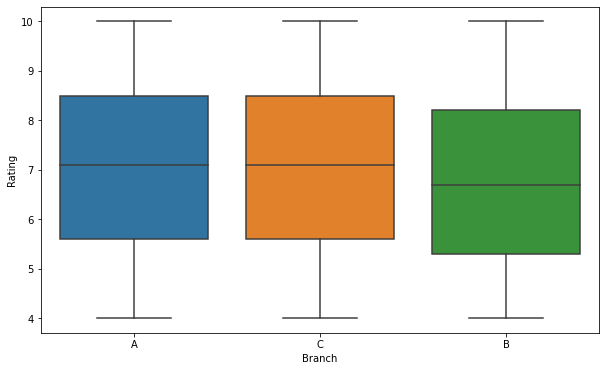

Branch
C    7.072866
A    7.027059
B    6.818072
Name: Rating, dtype: float64

In [16]:
#Q5: Which branch is having best in rating?

plt.figure(figsize=(10,6)) 
sns.boxplot(df["Branch"],df["Rating"])
plt.show()

df.groupby("Branch")["Rating"].mean().sort_values(ascending=False)

We can see that the average rating of branch A and C is more than seven and branch B is less than 7.

C:\Users\karun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


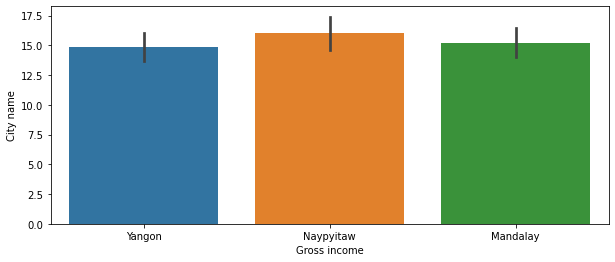

In [17]:
#Q6: Which city should be chosen for expansion and which products should it focus on?

plt.figure(figsize=(10,4)) 
sns.barplot(df["City"],df["gross income"])
plt.ylabel("City name")
plt.xlabel("Gross income")
plt.show()
plt.show()

It is obvious that Naypyitaw is the most profitable city, hence the expansion plan should be based on this city.

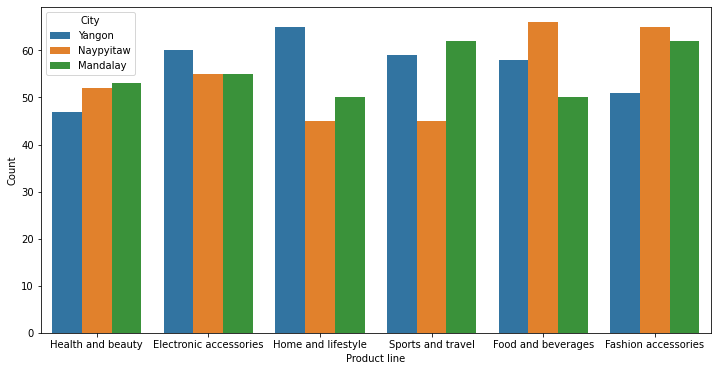

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="Product line",hue="City",data=df)
plt.xlabel("Product line")
plt.ylabel("Count")
plt.show()

Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.

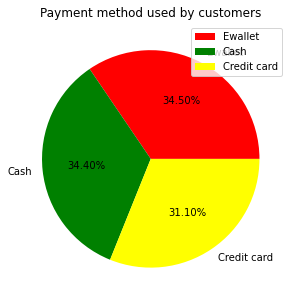

In [19]:
#Q7: Which is the most pouplar payment method used by customers?

p= df["Payment"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(p,colors= ["red","green","yellow"],labels=["Ewallet","Cash","Credit card"],autopct = "%0.2f%%")
plt.title("Payment method used by customers")
plt.legend(loc="upper right")
plt.show()

The most popular payment method is Ewallet.

In [20]:
#Q8: Is there any time trend in gross income?

df.groupby(df.index).mean().shape

(89, 8)

There are multiple dates per customers, so we have to summarize the data. We will use date as the index for this and for summarization we will use mean value of the variables. We get 89 rows i.e 89 unique days of data across all customers.

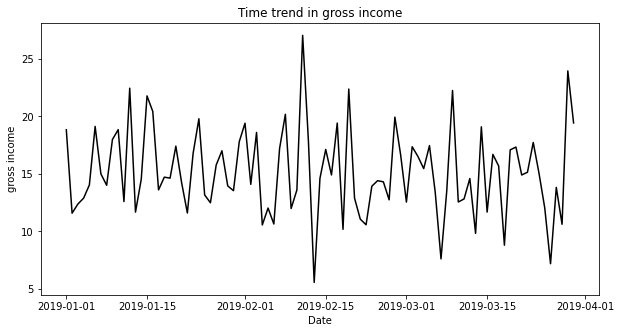

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x= df.groupby(df.index).mean().index, y = df.groupby(df.index).mean()["gross income"],color="black")
plt.title("Time trend in gross income")
plt.show()

No particular time trend except for some days the gross income is pretty high and some days it is pretty low. Overall it remains at a certain average level.

C:\Users\karun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


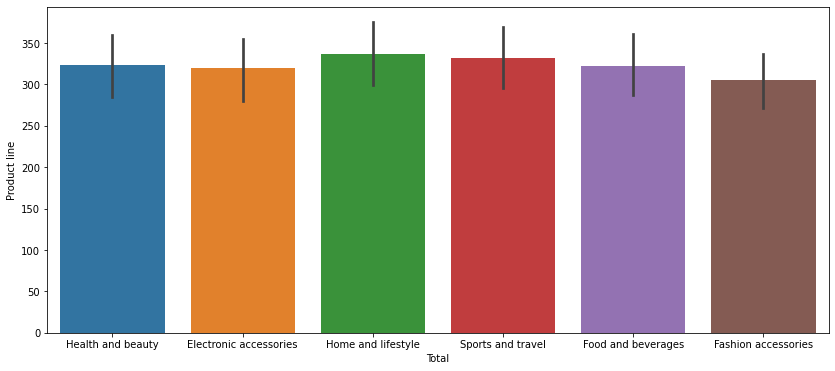

Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Total, dtype: float64

In [22]:
#Q9: Total bill in each product line ?

plt.figure(figsize=(14,6)) 
sns.barplot(df["Product line"],df["Total"])
plt.ylabel("Product line")
plt.xlabel("Total")
plt.show()
plt.show()

df.groupby("Product line")["Total"].mean().sort_values(ascending=False)

Home and life style, Sports and travel are the highest average sales of product.

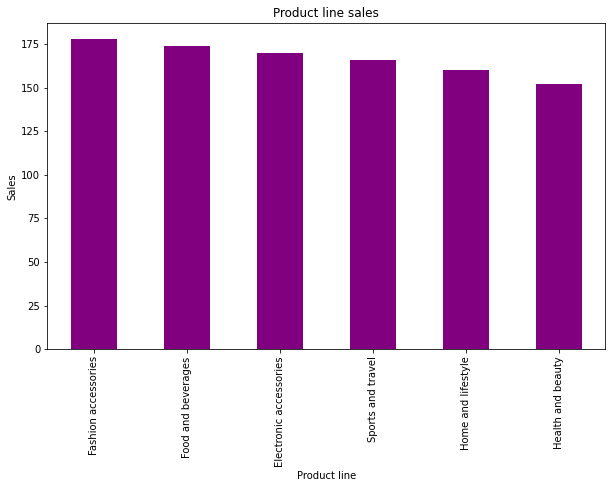

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [23]:
#Q10: Which product line has more sale ?

fig,a=plt.subplots(1,1,figsize=(10,6))
df["Product line"].value_counts().plot(kind="bar",color=["purple"],title="Product line sales")
plt.xlabel("Product line")
plt.ylabel("Sales")
plt.show()

df.groupby("Product line")["Product line"].count().sort_values(ascending=False)

Fashion accessories having more sales in the product line.

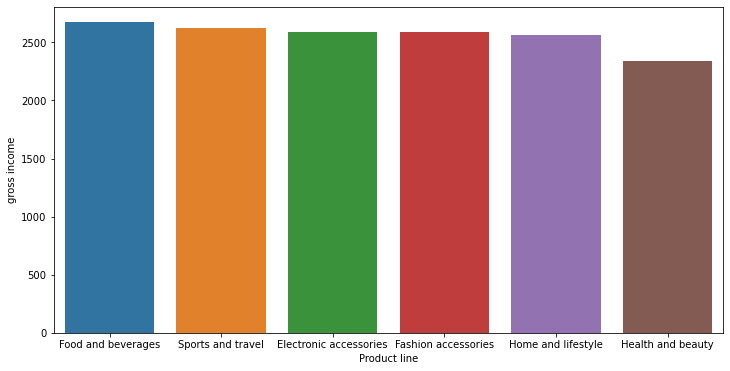

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

In [24]:
#Q11: Which product line generates most income?

cat=df[["Product line","gross income"]].groupby(["Product line"],as_index=False).sum()
cat_sort=cat.sort_values(by="gross income",ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x="Product line",y="gross income",data=cat_sort)
plt.show()

df.groupby("Product line")["gross income"].sum().sort_values(ascending=False)

Gross income is highest in Food and beverages.

C:\Users\karun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


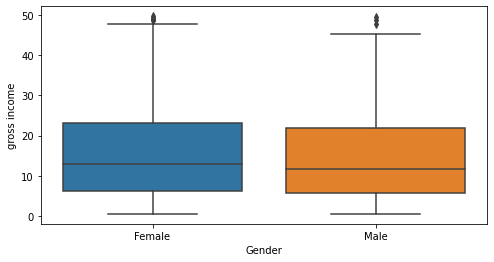

Gender
Female    15.956936
Male      14.799487
Name: gross income, dtype: float64

In [25]:
#Q12: What is the relationship between Gender and Gross income?

plt.figure(figsize=(8,4)) 
sns.boxplot(df["Gender"],df["gross income"])
plt.show()

df.groupby("Gender")["gross income"].mean()

Gross income is similar from both male and female, though female customers spend a bit higher.

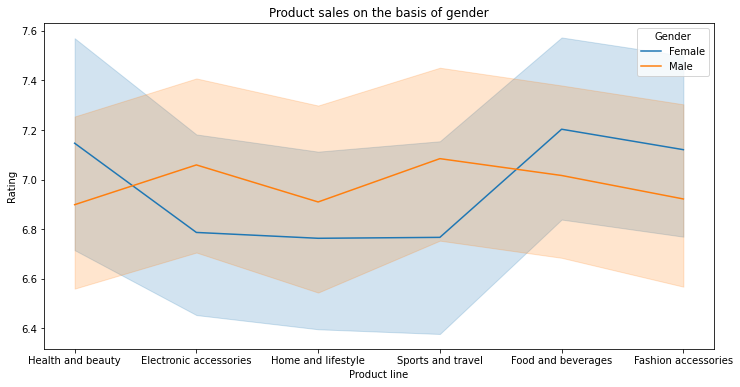

Product line            Gender
Electronic accessories  Male      86
                        Female    84
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Male      88
                        Female    64
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Female    88
                        Male      78
Name: Gender, dtype: int64

In [26]:
#Q13: Product sales on the basis of gender

plt.figure(figsize=(12,6))
sns.lineplot(x="Product line",y="Rating",hue="Gender",data=df).set_title("Product sales on the basis of gender")
plt.show()

df.groupby("Product line")["Gender"].value_counts()

Fashion accessories, Food and beverages are the most bought products by Female customers. Electronic accessories, Health and beauty are the most bought products by Male customers.

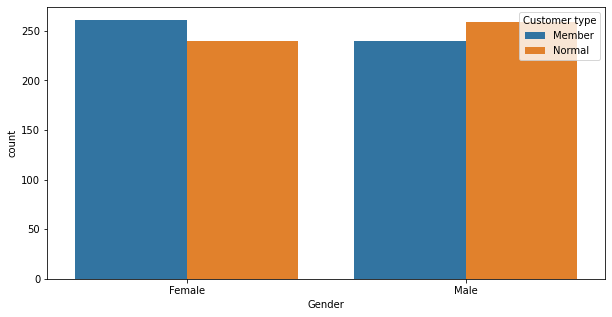

In [27]:
#Q14: Customer type basis on Gender

plt.figure(figsize=(10,5))
sns.countplot(hue=df["Customer type"],x=df["Gender"])
plt.show()

In [28]:
#what is the distribution of customer type for each Gender

pd.pivot_table(df,index="Customer type",values="Invoice ID",columns="Gender",aggfunc="count")

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


Most of the Females have membership card.

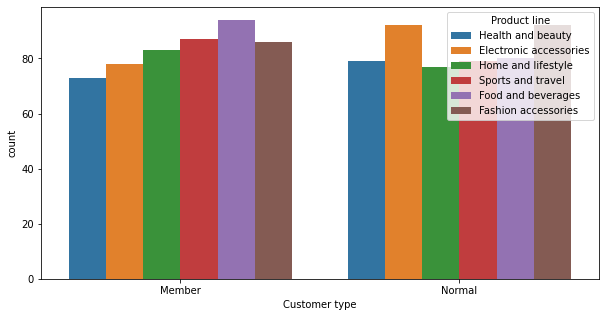

In [29]:
#Q15: Customer type basis on Product line

plt.figure(figsize=(10,5))
sns.countplot(x=df["Customer type"],hue=df["Product line"])
plt.show()

In [30]:
pd.pivot_table(df,index="Customer type",values="Invoice ID",columns="Product line",aggfunc="count")

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,78,86,94,73,83,87
Normal,92,92,80,79,77,79


Customers with membership card are buying more products from Food and beverages and Non-membership customers are buying more products from Electronic accessories.

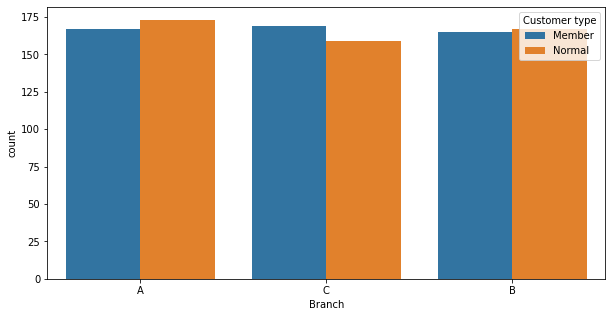

In [31]:
#Q16: Customer type basis on Branch

plt.figure(figsize=(10,5))
sns.countplot(hue=df["Customer type"],x=df["Branch"])
plt.show()

In [32]:
#what is the distribution of customer type for each branch
pd.pivot_table(df,index="Customer type",values="Invoice ID",columns="Branch",aggfunc="count")

Branch,A,B,C
Customer type,,,
Member,167,165,169
Normal,173,167,159


There are more Membership type customers from Branch C.

C:\Users\karun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


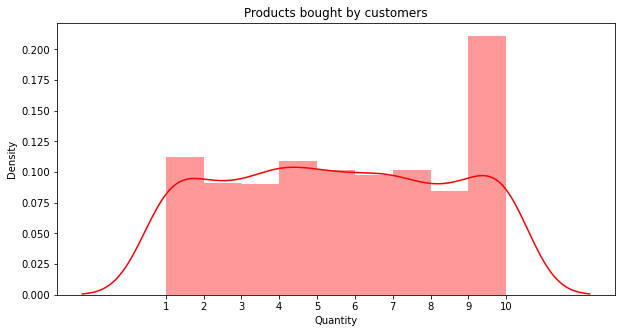

10    119
1     112
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [33]:
#Q17: How many products are bought by customers?

plt.figure(figsize=(10,5))
x_ticks=[1,2,3,4,5,6,7,8,9,10]
sns.distplot(df.Quantity,color="r").set_title("Products bought by customers")
plt.xticks(x_ticks)
plt.show()

df[["Quantity"]]["Quantity"].value_counts().sort_values(ascending=False)

Most of the customers buy 10 quantities.

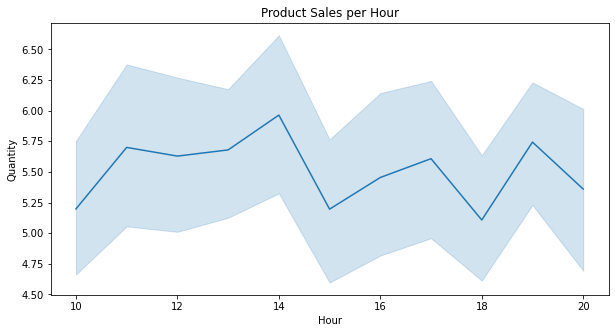

In [34]:
#Q18: Which hour of the day is the busiest?

#We need to extract the hour from the "Date" variable to do this analysis.
df["Time"]=pd.to_datetime(df["Time"])
df["Hour"]=(df["Time"]).dt.hour
df["Hour"].unique()

plt.figure(figsize=(10,5))
sns.lineplot(x=df.Hour,y=df.Quantity).set_title("Product Sales per Hour")
plt.show()

Peak is observed at 2 pm of the day. Hence, sales is typically higher in the afternoons.

C:\Users\karun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


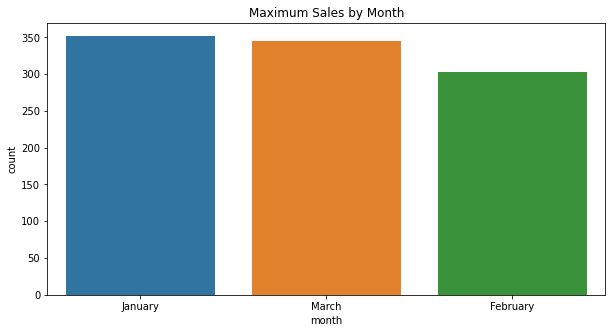

month
January     352
March       345
February    303
Name: gross income, dtype: int64

In [35]:
#Q19: Which Month has maximum sales?

plt.figure(figsize=(10, 5))
sns.countplot(df.month).set_title("Maximum Sales by Month")
plt.show()

df.groupby("month")["gross income"].count().sort_values(ascending=False)

Sales are highest in the month of January.

C:\Users\karun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


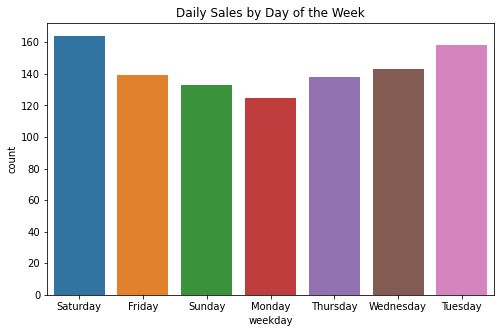

In [36]:
#Q20: Which day of the week has maximum sales?

plt.figure(figsize=(8, 5))
sns.countplot(df.weekday).set_title('Daily Sales by Day of the Week')
plt.show()

Sales are highest on Saturdays probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales, probably because it is start of the working week.

In [37]:
#Q21: Which product line should the supermarket focus on?

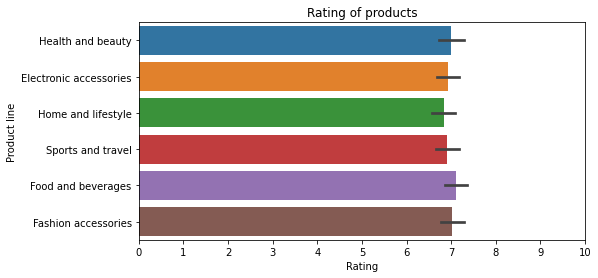

In [38]:
#i) Rating of products

plt.figure(figsize=(8,4))
x_ticks = [0,1,2,3,4,5,6,7,8,9,10]
sns.barplot(y=df["Product line"],x=df.Rating).set_title("Rating of products")
plt.xticks(x_ticks)
plt.show()

Rating is similar across products and at around 7.

C:\Users\karun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


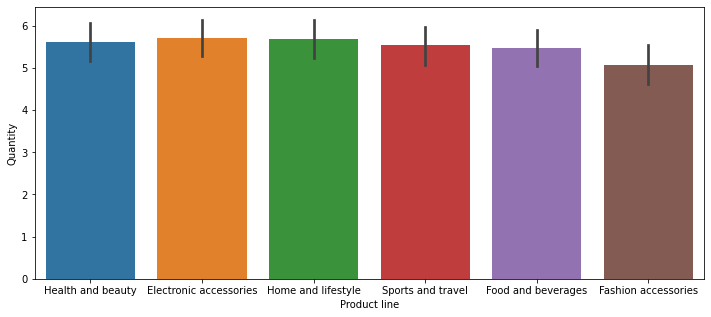

City
Naypyitaw    16.052367
Mandalay     15.232024
Yangon       14.874001
Name: gross income, dtype: float64

In [39]:
#ii) Quantity purchased in productline

plt.figure(figsize=(12,5)) 
sns.barplot(df["Product line"],df["Quantity"])
plt.ylabel("Quantity")
plt.xlabel("Product line")
plt.show()
plt.show()

df.groupby("City")["gross income"].mean().sort_values(ascending=False)

Though the rating for fashion accessories and food and beverages is high but quantity purchased is low. Hence, supply for these products need to be increased.

# Visualizing the pair wise correlations

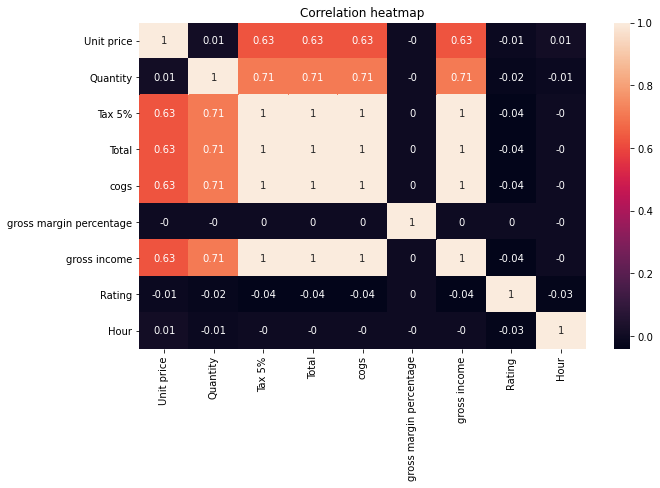

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.corr(),2),annot=True).set_title("Correlation heatmap")
plt.show()

As you can see, unit price is positively correlated to cogs with 63% correlation. Another interesting observation is that ‘Ratings’ hardly has any correlation with any other variables.As is obvious, Quantity and gross income has very high correlation of 70%.

# Conclusion:

#There is no relationship between gross income and customer ratings.

#The data consists of 3 cities/branches. Though branch A(Yangon)has slightly higher sales than the B(Mandalay) & C(Naypyitaw), The branch C i.e. Naypyitaw is the most profitable branch in terms of gross income and also in the case of average rating branch A and C is quite similar.

#Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on along with electronic accessories.

#The most popular payment method is E-wallet and cash payment is also on the higher side.

#There is no particular time trend that can be observed in gross income.

#At an overall level, Fashion accessories having more sales in the product line but ‘Food and beverages’ generates highest gross income in the product line.

#Gross income is similar from both male and female, though female customers spend a bit higher.Females spend on ‘fashion accessories’ the most and for males surprisingly it is ‘Health and beauty’.The spending capacity of females more on ‘Food and beverages’ which generates highest gross income overall.

#On the basis of customer type females with member card bought more products than males from Branch C.

#Most of the customers buy 10 quantities and busiest time of the day is afternoon i.e. around 2 pm which records highest sales. In the month wise sales January is higher and on the basis of days, Tuesdays and Saturdays has showing great compared to the rest of the week.

#Though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but the quantity purchased is low. Hence, supply for these products need to be increased.

#Using the correlation analysis, one interesting observation has emerged that customer ratings is not related to any variable.
